<a href="https://colab.research.google.com/github/ienoiaa/ienoia/blob/master/Calvario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Do the preliminary EDA processes.

a. Import libraries

b. Loading the data


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dssc = pd.read_csv("ds_salaries_clean.csv")

c. Checking the first 5 rows

In [56]:
print("First 5 rows")
dssc.head()

First 5 rows


,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_Rupee,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,2020,Data Scientist,Mid,FT,DE,L,0,"76,227",NaN,NaN,NaN
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,"248,257",NaN,NaN,NaN
2,2020,Big Data Engineer,Senior,FT,GB,M,50,"104,100",NaN,NaN,NaN
3,2020,Product Data Analyst,Mid,FT,HN,S,0,NaN,NaN,NaN,NaN
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,"143,225",NaN,NaN,NaN


d. Check the information

In [57]:
print("Information")
dssc.info()

Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          607 non-null    int64  
 1   Designation           607 non-null    object 
 2   Experience            607 non-null    object 
 3   Employment_Status     607 non-null    object 
 4   Employee_Location     607 non-null    object 
 5   Company_Size          607 non-null    object 
 6   Remote_Working_Ratio  607 non-null    int64  
 7   Salary_Rupee          600 non-null    object 
 8   Unnamed: 8            0 non-null      float64
 9   Unnamed: 9            0 non-null      float64
 10  Unnamed: 10           2 non-null      object 
dtypes: float64(2), int64(2), object(7)
memory usage: 52.3+ KB


e. Count the value of the categorical data

In [58]:
print("Value counts")
print(dssc['Designation'].value_counts())
print(dssc['Experience'].value_counts())
print(dssc['Employment_Status'].value_counts())
print(dssc['Employee_Location'].value_counts())
print(dssc['Company_Size'].value_counts())
print(dssc['Remote_Working_Ratio'].value_counts())
print(dssc['Salary_Rupee'].value_counts())

Value counts
Designation
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Machine Learning Scientist                    8
Big Data Engineer                             8
Director of Data Science                      7
AI Scientist                                  7
Principal Data Scientist                      7
Data Science Consultant                       7
Data Analytics Manager                        7
BI Data Analyst                               6
Computer Vision Engineer                      6
ML Engineer                                   6
Lead Data Engineer                            6
Applied Data Scientist                        5
Business Data Analyst                         5
Data Engineerin

f. Describe the data

In [59]:
print("Describe")
dssc.describe()

Describe


,Working_Year,Remote_Working_Ratio,Unnamed: 8,Unnamed: 9
count,607.000000,607.00000,0.0,0.0
mean,2021.405272,70.92257,NaN,NaN
std,0.692133,40.70913,NaN,NaN
min,2020.000000,0.00000,NaN,NaN
25%,2021.000000,50.00000,NaN,NaN
50%,2022.000000,100.00000,NaN,NaN
75%,2022.000000,100.00000,NaN,NaN
max,2022.000000,100.00000,NaN,NaN


2. Convert the string to number for Salary_Rupee, convert the datatype to float and convert it to USD.

In [64]:
dssc["Salary_Rupee"] = dssc["Salary_Rupee"].astype(str).str.replace(",", "").astype(float)
conversion_rate = 0.012
dssc["Salary_USD"] = dssc["Salary_Rupee"] * conversion_rate
print(dssc[['Salary_Rupee', 'Salary_USD']].head())

   Salary_Rupee  Salary_USD
0       76227.0     914.724
1      248257.0    2979.084
2      104100.0    1249.200
3           NaN         NaN
4      143225.0    1718.700


3. Visualize the data Salary_Rupee and Salary_USD by Experience using boxplot.


Visualization of Salary_Rupee and Salary_USD by Experience using boxplot.


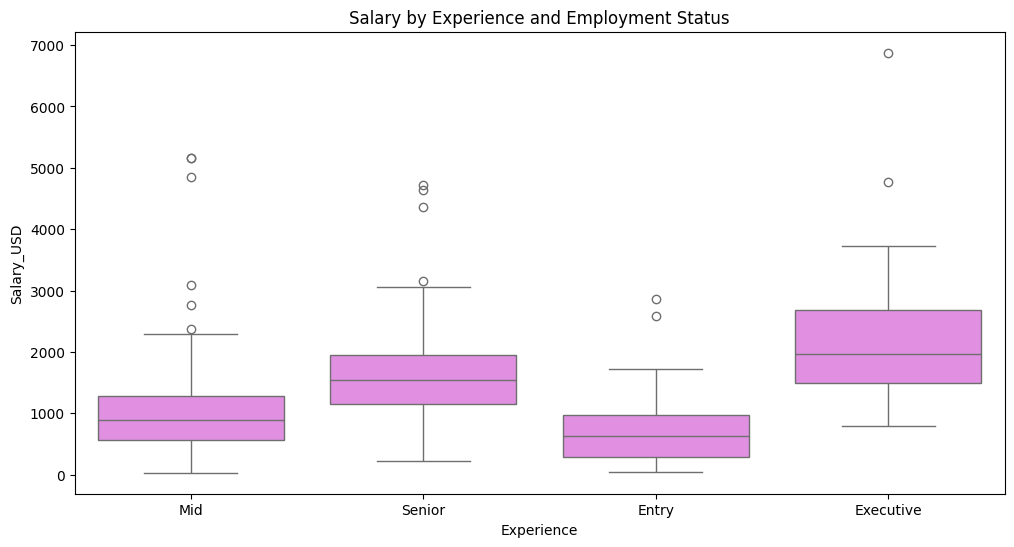

In [65]:
print("Visualization of Salary_Rupee and Salary_USD by Experience using boxplot.")

plt.figure(figsize=(12,6))
sns.boxplot(x="Experience", y="Salary_USD", data=dssc, color="Violet")
plt.title("Salary by Experience and Employment Status")
plt.show()

Answer : This boxplot reveals that as professional experience increases from Entry to Executive level, the median salary and its variability in USD both consistently rise, with several high-earning outliers present in the non-executive roles.

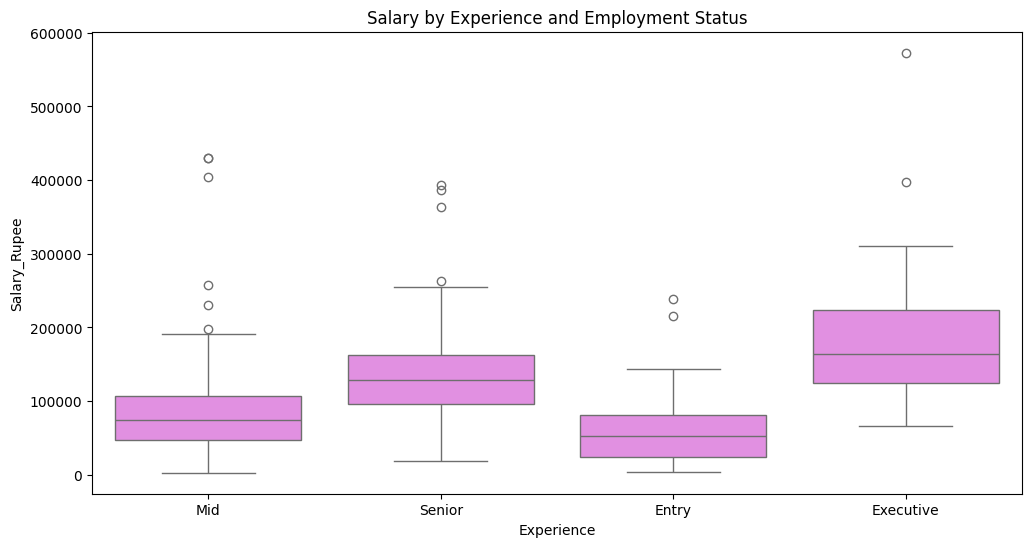

In [66]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Experience", y="Salary_Rupee", data=dssc, color="Violet")
plt.title("Salary by Experience and Employment Status")
plt.show()

Answer: Visually identical to the initial chart and despite a minor title error, this plot confirms that the data cleaning process did not alter the strong positive correlation between experience level and salary in USD.

4. Handle the missing data.

In [67]:
print("Missing data")
print(dssc.isnull().sum())

Missing data
Working_Year              0
Designation               0
Experience                0
Employment_Status         0
Employee_Location         0
Company_Size              0
Remote_Working_Ratio      0
Salary_Rupee              7
Unnamed: 8              607
Unnamed: 9              607
Unnamed: 10             605
Salary_USD                7
dtype: int64


5. Handle the outliers

a. Compute the 75th – 25th quartile

In [68]:
Q1 = dssc["Salary_USD"].quantile(0.25)
Q3 = dssc["Salary_USD"].quantile(0.75)

b. Compute the IQR

In [69]:
IQR = Q3 - Q1

c. Get the lower and upper threshold.

In [70]:
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

In [71]:
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower Threshold:", lower_threshold)
print("Upper Threshold:", upper_threshold)

Q1: 731.316
Q3: 1718.7
IQR: 987.384
Lower Threshold: -749.76
Upper Threshold: 3199.776


d. Drop the outliers

In [52]:
df_clean = dssc[(dssc["Salary_USD"] >= lower_threshold) & (dssc["Salary_USD"] <= upper_threshold)]

e. Visualize using boxplot and describe the cleaned data.

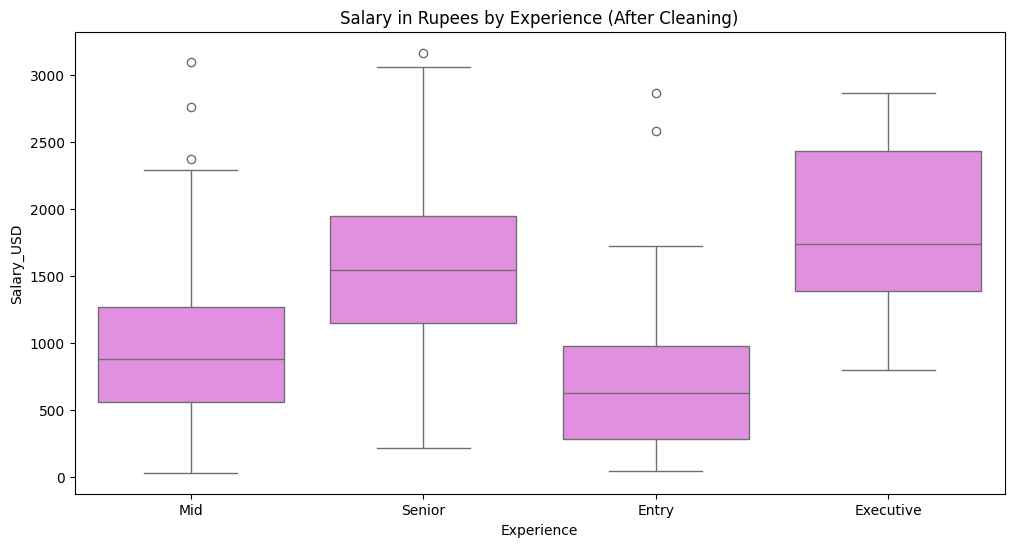

In [72]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Experience", y="Salary_USD", data=df_clean, color="Violet")
plt.title("Salary in Rupees by Experience (After Cleaning)")
plt.show()

Answer: This graph represents the salary data in Indian Rupees, reaffirming that both median compensation and salary range expand significantly with each progressive level of professional experience.

In [73]:
print(df_clean.describe())

       Working_Year  Remote_Working_Ratio   Salary_Rupee  Unnamed: 8  \
count    590.000000            590.000000     590.000000         0.0   
mean    2021.422034             70.677966  102773.666102         NaN   
std        0.684430             40.742865   55901.732659         NaN   
min     2020.000000              0.000000    2730.000000         NaN   
25%     2021.000000             50.000000   60128.000000         NaN   
50%     2022.000000            100.000000   95483.000000         NaN   
75%     2022.000000            100.000000  142810.000000         NaN   
max     2022.000000            100.000000  263534.000000         NaN   

       Unnamed: 9   Salary_USD  
count         0.0   590.000000  
mean          NaN  1233.283993  
std           NaN   670.820792  
min           NaN    32.760000  
25%           NaN   721.536000  
50%           NaN  1145.796000  
75%           NaN  1713.720000  
max           NaN  3162.408000  
